In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Bias and Variance [(link)](http://scott.fortmann-roe.com/docs/BiasVariance.html)
![](./images/bv.png)
![](./images/data1.png)
![](./images/data.png)
![](./images/hoods.png)
![](./images/k=1.png)
![](./images/k=10.png)
![](./images/k=100.png)

# Review:
![](https://cambridgecoding.files.wordpress.com/2016/03/figures_mod4_over_underfitting.png?w=610&h=806)

# Break:

## [Deep Reinfocement Learning](https://www.youtube.com/watch?v=V1eYniJ0Rnk)
## [Deep RL with Genetic Algorithms](https://www.youtube.com/watch?v=qv6UVOQ0F44)

# On the Iris Dataset

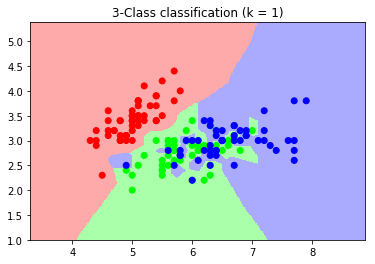

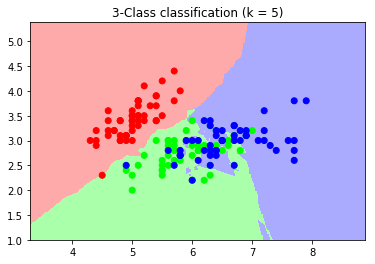

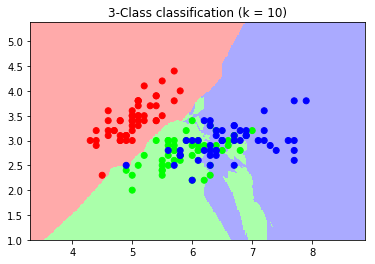

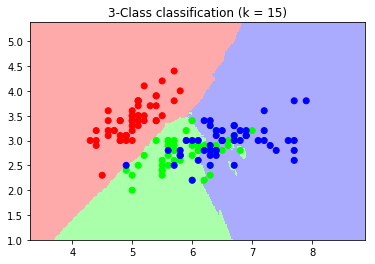

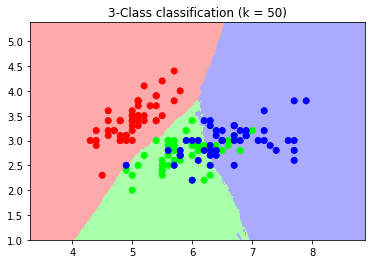

In [5]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in [1, 5, 10, 15, 50]:

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

# Our own implementation

In [6]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [7]:
def kNN_fit(X, y):
    return [X, y]

In [8]:
def kNN_predict(model, test, k):
    X, y = model
    preds = []
    for i in range(test.shape[0]):
        distances = []
        for j in range(X.shape[0]):
            dist = euc_dist(test[i], X[j])
            distances.append(dist)
        closest = [j for (i,j) in sorted(zip(distances,y))][:k]
        pred = max(set(closest), key=closest.count)
        preds.append(pred)
    return preds

# On Synthetic Data

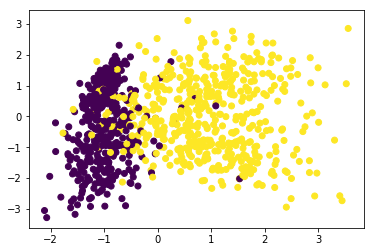

In [9]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X1, Y1 = make_classification(n_samples=1000,
                             n_features=2, 
                             n_redundant=0, 
                             n_informative=2,
                             n_clusters_per_class=2, 
                             n_classes=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

In [10]:
X_train = X1[:200]
X_valid = X1[200:]
y_train = Y1[:200]
y_valid = Y1[200:]

# Choosing k

In [11]:
for k in range(4, 10):
    fitted = kNN_fit(X_train, y_train)
    preds = np.array(kNN_predict(fitted, X_valid, k))
    acc = sum(preds == y_valid)/800
    print("Accuracy for k={}: {}".format(k, acc))

Accuracy for k=4: 0.9275
Accuracy for k=5: 0.93
Accuracy for k=6: 0.92625
Accuracy for k=7: 0.9275
Accuracy for k=8: 0.92625
Accuracy for k=9: 0.92875


# On MNIST

In [18]:
train = pd.read_csv("../../datasets/MNIST/train.csv")
test = pd.read_csv("../../datasets/MNIST/test.csv")

FileNotFoundError: File b'../../datasets/MNIST/train.csv' does not exist

In [17]:
X_train = train.drop("label", axis=1)
y_train = train.label

NameError: name 'train' is not defined

In [ ]:
# This will take awhile
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.predict(test)